In [1]:
# Import modules

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# To work with text data 
import re
import string

In [2]:
# Reading the dataset
df = pd.read_csv("Mealapp_dataset.csv", encoding='Latin-1')

In [3]:
# Checking the first 5 rows of the dataset
df.head()

,Name,Customer_id,Customer_loc,Order_id,Vendor,Vendor_id,Vendor_lat,Vendor_long,Vendor_add,Category,...,Meal_name,Meal_category,Meal_price,Meal_description,Drink_id,Drink_category,Drink_name,Drink_price,Review,Rating
0,Hart Lorenz,9010,"Community road, 46",0bdeeb2f-febc-4751-b06d-577ddfcdef3c,SO FRESH,899314,6.515150,3.369250,"280 Herbert Macaulay Way, alagomeji Yaba, Lagos",Meal_category,...,Grilled Fish with Plantain,Grilled Specialties,3000,Delicious Grilled Fish with Plantain made with...,NaN,Carbonated Drink,Pepsi,300,Fresh ingredients and authentic taste.,4
1,James Donald,6188,"Community road, 48",c931c964-7317-4c9b-b326-60ab0551ea47,Hard Rock,104291,6.424828,3.442378,"Landmark Village, Water Corporation Road, Oni...",Meal_category,...,Grilled Beef Skewers with Spicy Sauce,Grilled Specialties,2200,Delicious Grilled Beef Skewers with Spicy Sauc...,NaN,Juice,Apple Juice,1100,Good portion size and value for money.,3
2,Maathai Wangari,3670,"Community road, 45",35df5cdf-4060-464f-ae80-1a4ab09604f3,Kinglace,899314,6.515150,3.369250,"390 Herbert Macaulay Way, Sabo yaba, Lagos",Drink_category,...,Fish Suya Skewers,Fish / Meats,1500,Delicious Fish Suya Skewers made with authenti...,NaN,Carbonated Drink,7up,300,Good portion size and value for money.,3
3,Ace Jane,1614,"Community road, 48",edd8701e-3c39-4ba5-a44b-123525f16eff,SO FRESH,899314,6.515150,3.369250,"280 Herbert Macaulay Way, alagomeji Yaba, Lagos",Drink_category,...,Chocolate Bread,Desserts,1000,Delicious Chocolate Bread made with authentic ...,NaN,Juice,Pinneaple Juice,800,Fresh ingredients and authentic taste.,4
4,Fakes Dennis,1762,"Community road, 47",ec81e575-c0a0-4d67-981e-35db3fca5ac7,Hard Rock,104291,6.424828,3.442378,"Landmark Village, Water Corporation Road, Oni...",Meal_category,...,BBQ Chicken Wings with French Fries,Grilled Specialties,1800,Delicious BBQ Chicken Wings with French Fries ...,NaN,Carbonated Drink,Biggi Cola,300,Food was cold and tasteless. Disappointed.,1


In [4]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5000 non-null   object 
 1   Customer_id       5000 non-null   int64  
 2   Customer_loc      5000 non-null   object 
 3   Order_id          5000 non-null   object 
 4   Vendor            5000 non-null   object 
 5   Vendor_id         5000 non-null   int64  
 6   Vendor_lat        5000 non-null   float64
 7   Vendor_long       5000 non-null   float64
 8   Vendor_add        5000 non-null   object 
 9   Category          5000 non-null   object 
 10  Meal_id           0 non-null      float64
 11  Meal_name         5000 non-null   object 
 12  Meal_category     5000 non-null   object 
 13  Meal_price        5000 non-null   int64  
 14  Meal_description  5000 non-null   object 
 15  Drink_id          0 non-null      float64
 16  Drink_category    5000 non-null   object 


In [5]:
# Checking if any of the column have a missing value
df.isnull().any()

Name                False
Customer_id         False
Customer_loc        False
Order_id            False
Vendor              False
Vendor_id           False
Vendor_lat          False
Vendor_long         False
Vendor_add          False
Category            False
Meal_id              True
Meal_name           False
Meal_category       False
Meal_price          False
Meal_description    False
Drink_id             True
Drink_category      False
Drink_name          False
Drink_price         False
Review              False
Rating              False
dtype: bool

In [6]:
# Dropping some columns
df = df.drop(['Customer_id', 'Vendor_id', 'Vendor_lat', 'Vendor_long'], axis=1)

In [7]:
# Checking the columns in the dataset
df.columns

Index(['Name', 'Customer_loc', 'Order_id', 'Vendor', 'Vendor_add', 'Category',
       'Meal_id', 'Meal_name', 'Meal_category', 'Meal_price',
       'Meal_description', 'Drink_id', 'Drink_category', 'Drink_name',
       'Drink_price', 'Review', 'Rating'],
      dtype='object')

In [8]:
# Checking the value count of the firt 5 most ordered food
df["Meal_name"].value_counts().head()

Coconut Candy                    145
Peppered Snails                  133
Ogbono Soup with Eba             128
Egusi Soup with Pounded Yam      119
Fried Rice with Beef Stir-Fry    115
Name: Meal_name, dtype: int64

In [9]:
# Checking the value count of the firt 5 most ordered drink
df["Drink_name"].value_counts().head()

Pepsi               470
Raspberry ripple    365
Orange Juice        312
Coke                301
Mirinda             245
Name: Drink_name, dtype: int64

In [10]:
# Checking the vendor with most order
df["Vendor"].value_counts()

Hard Rock    1291
SO FRESH     1258
Kinglace     1237
The Place    1214
Name: Vendor, dtype: int64

In [11]:
# Value count of the drink category column
df["Drink_category"].value_counts()

Juice                1685
Carbonated Drink     1670
Ice Cream / Drink     835
Ice Cream             810
Name: Drink_category, dtype: int64

In [12]:
# Value count of the meal category column
df["Meal_category"].value_counts()

Desserts                     626
Grilled Specialties          396
Appetizers                   378
Fish / Meats                 317
Vegetarian Delights          315
Specialties                  310
Side Dishes                  295
Local Delicacies             219
Rice Dishes                  215
Rice and Grains              214
Delicacies                   208
Main Dishes                  205
Vegetarian                   198
Nigerian Soups and Stews     197
Swallow and Soups / Stews    185
Vegetarian Dishes            185
Staple Food with Soups       182
Grains                       181
Seafood Delights             174
Name: Meal_category, dtype: int64

In [13]:
# Getting the Positive and negative reviews
Positive_reviews = df[df['Rating'] > 2]
Negative_reviews = df[df['Rating'] <= 2]  

In [14]:
# Getting the positive and negative reviews count 
Positive_counts = Positive_reviews['Vendor'].value_counts()
Negative_counts = Negative_reviews['Vendor'].value_counts()
counts = pd.concat([Positive_counts, Negative_counts], axis=1)
counts.columns = ['Positive Ratings', 'Negative Ratings']
print(counts)

           Positive Ratings  Negative Ratings
Hard Rock               786               505
Kinglace                739               498
SO FRESH                735               523
The Place               705               509


In [15]:
# Making a function to remove all the punctuations
def Text_cleaning(text):
    Text  = "".join([char for char in text if char not in string.punctuation])    
    return Text

In [16]:
# Let's clean the meal description column 
df['Meal_description'] = df['Meal_description'].apply(Text_cleaning)

In [17]:
# Let's clean the review column
df['Review'] = df['Review'].apply(Text_cleaning)

Text(0.5, 1.0, 'Line plot of Meal name Versus Meal price')

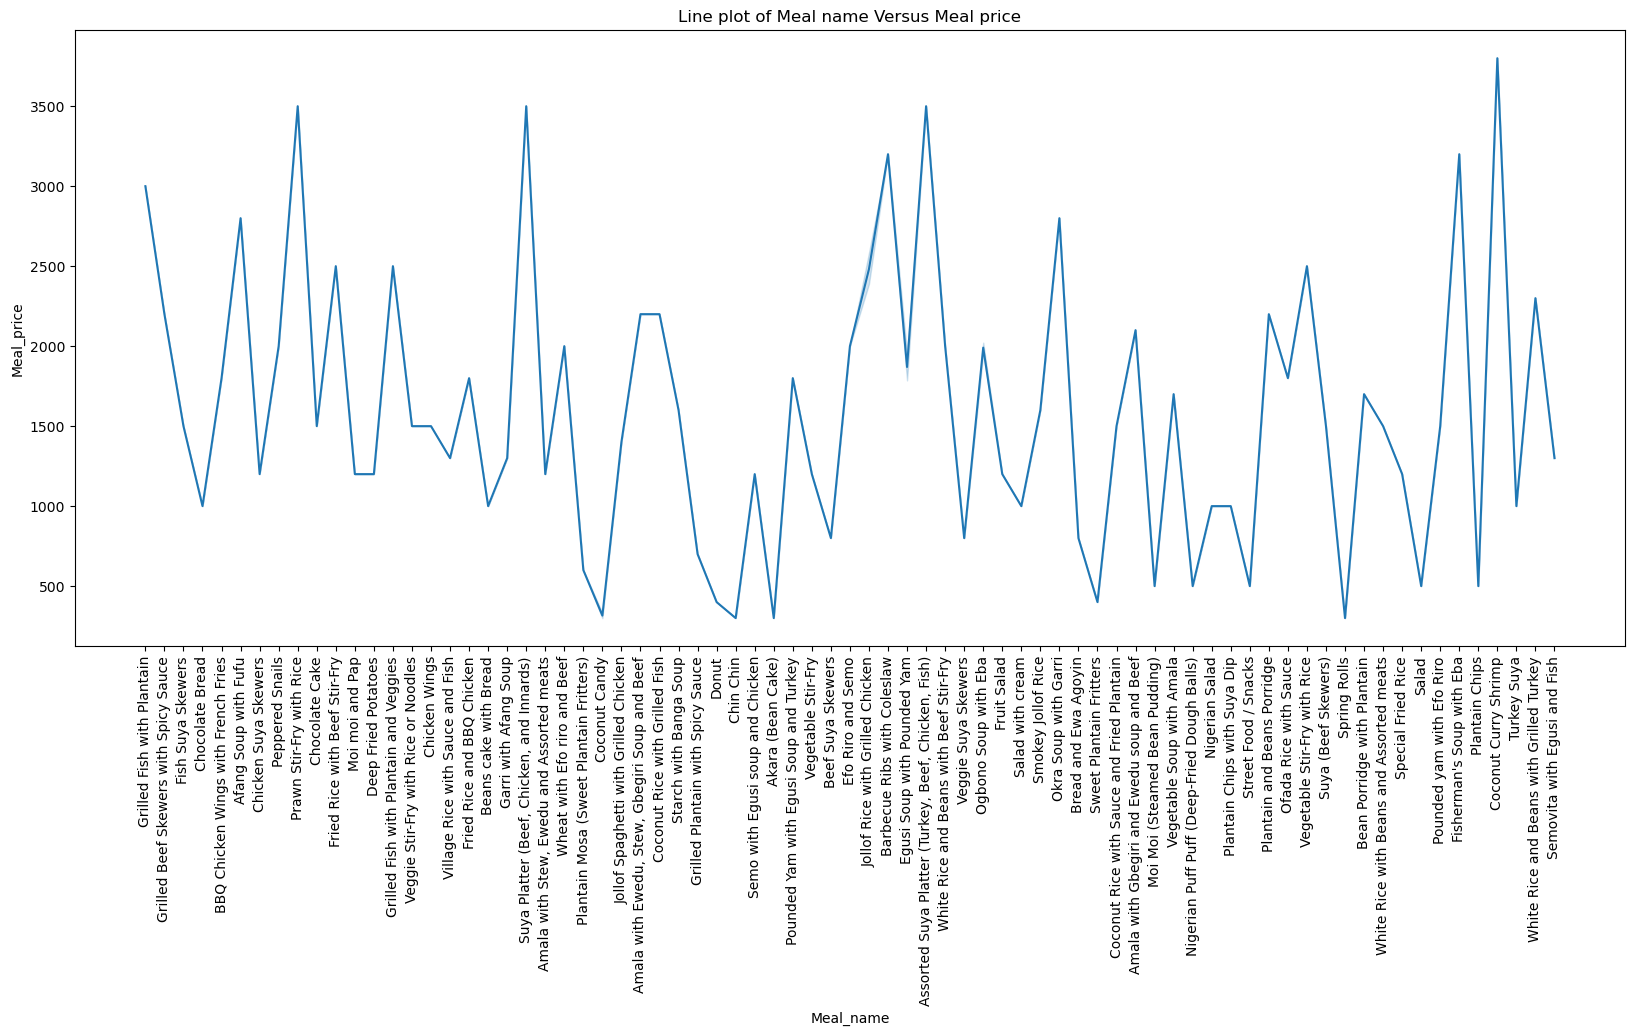

In [18]:
# Line plot of meal price and meal name
plt.figure(figsize=(20,8))
sns.lineplot(y="Meal_price", x="Meal_name", data=df)
plt.xticks(rotation=90)
plt.title("Line plot of Meal name Versus Meal price")

**Above we can see the food with the highest and lowest price of the food.**

Text(0.5, 1.0, 'Line plot of Drink name Versus Drink price')

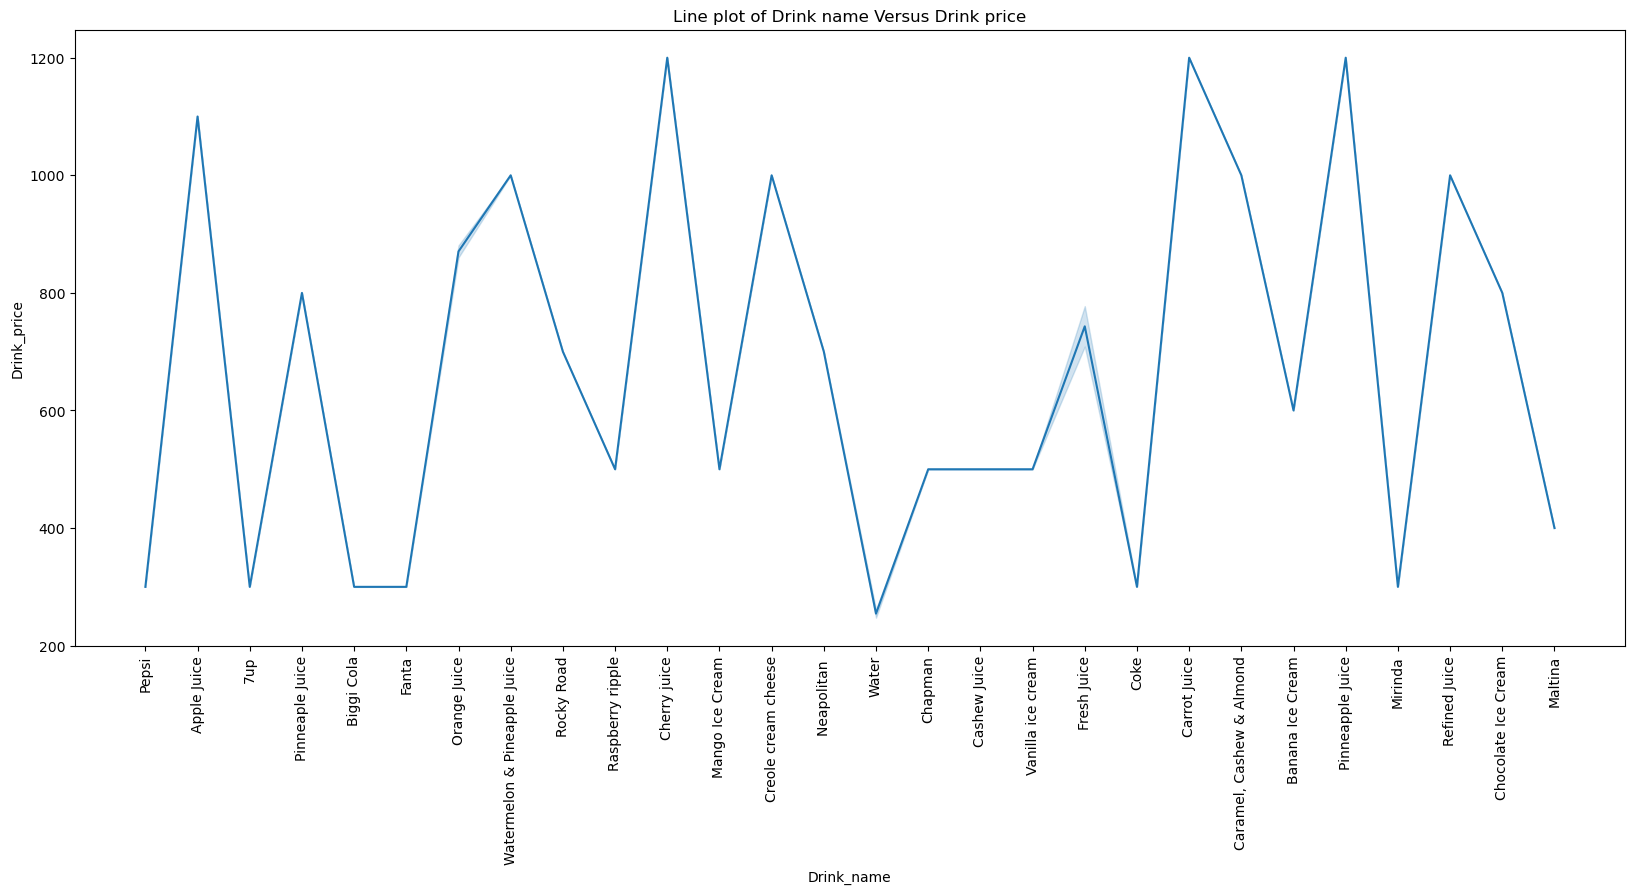

In [19]:
# Line plot of drink price and meal name
plt.figure(figsize=(20,8))
sns.lineplot(y="Drink_price", x="Drink_name", data=df)
plt.xticks(rotation=90)
plt.title("Line plot of Drink name Versus Drink price")

In [20]:
# Counting the top 10 most common words in the review column
from collections import Counter

most_common = Counter(df["Review"]).most_common(10)
most_common

[('Amazing experience Will definitely order again', 809),
 ('Fresh ingredients and authentic taste', 803),
 ('Good portion size and value for money', 788),
 ('Great service and quality Highly recommend', 786),
 ('Delicious food Loved the flavors', 767),
 ('Food was cold and tasteless Disappointed', 224),
 ('Food arrived late and order was incorrect', 215),
 ('Overpriced for the quality received', 213),
 ('Unappetizing presentation Wont order again', 198),
 ('Slow delivery and poor customer service', 197)]

In [21]:
# Appending the words
words = []
freq = []
for word, count in most_common:
    words.append(word)
    freq.append(count)

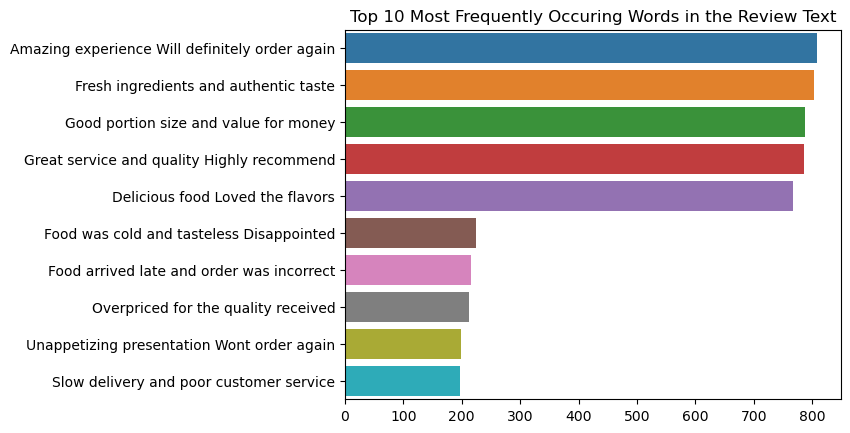

In [22]:
# Plotting a barplot of the most common words
sns.barplot(x=freq, y=words)
plt.title("Top 10 Most Frequently Occuring Words in the Review Text")
plt.show()

Text(0.5, 1.0, 'Scatter plot showing relationship between Drink name and Drink price')

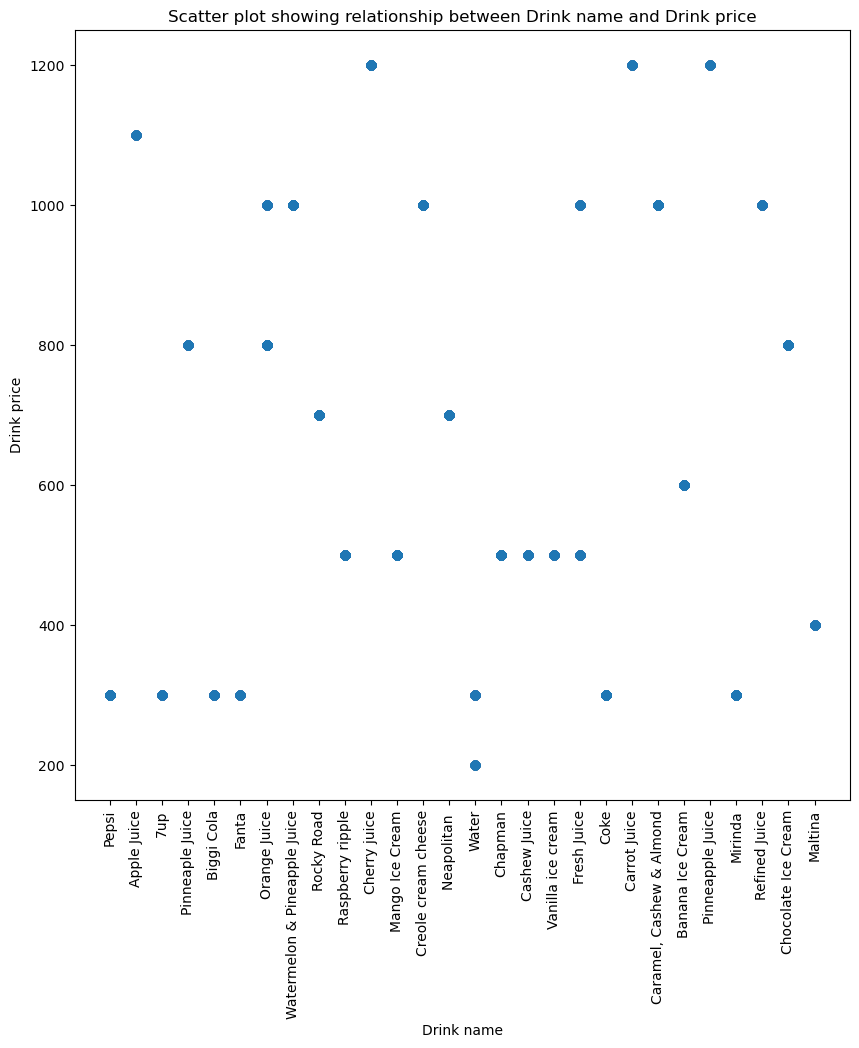

In [23]:
# Scatter plot of drink name and drink price
plt.figure(figsize=(10,10))
plt.scatter(x='Drink_name',y='Drink_price',data=df)
plt.xlabel('Drink name')
plt.ylabel('Drink price')
plt.xticks(rotation=90)
plt.title("Scatter plot showing relationship between Drink name and Drink price")

Text(0.5, 1.0, 'Scatter plot showing relationship between Meal name and Meal price')

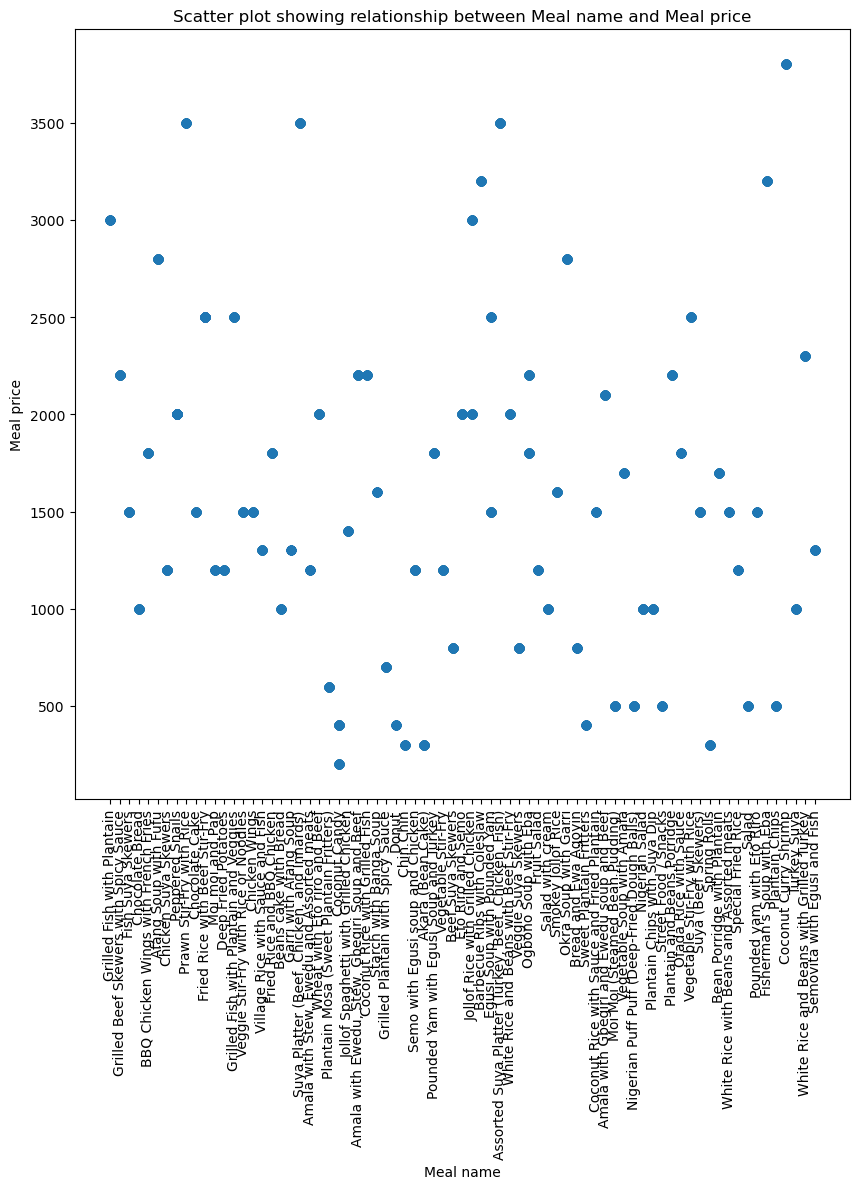

In [24]:
# Scatter plot of meal name and price
plt.figure(figsize=(10,10))
plt.scatter(x='Meal_name',y='Meal_price',data=df)
plt.xlabel('Meal name')
plt.ylabel('Meal price')
plt.xticks(rotation=90)
plt.title("Scatter plot showing relationship between Meal name and Meal price")

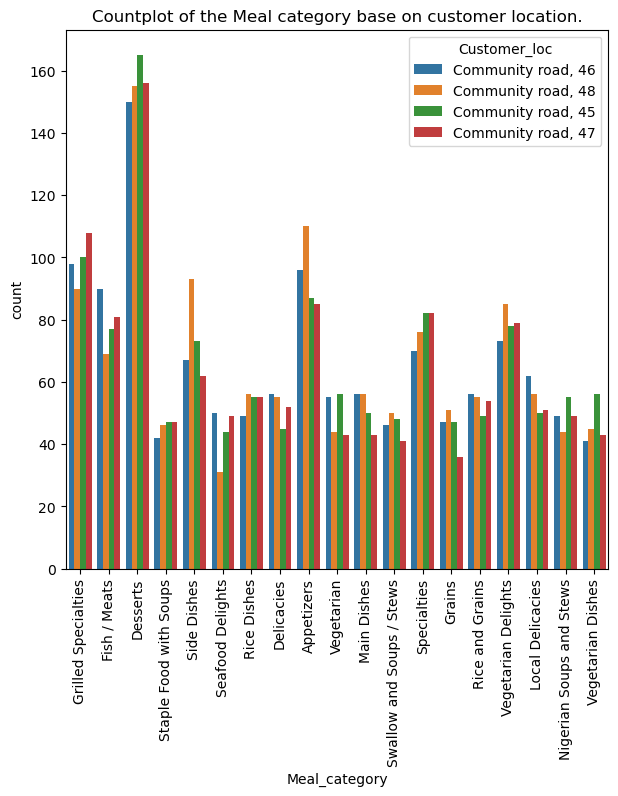

In [25]:
# Plotting a countplot of the meal category base on location
plt.figure(figsize=(7, 7))
sns.countplot(x=df["Meal_category"], hue=df["Customer_loc"])
plt.xticks(rotation=90)
plt.title("Countplot of the Meal category base on customer location.")
plt.show()

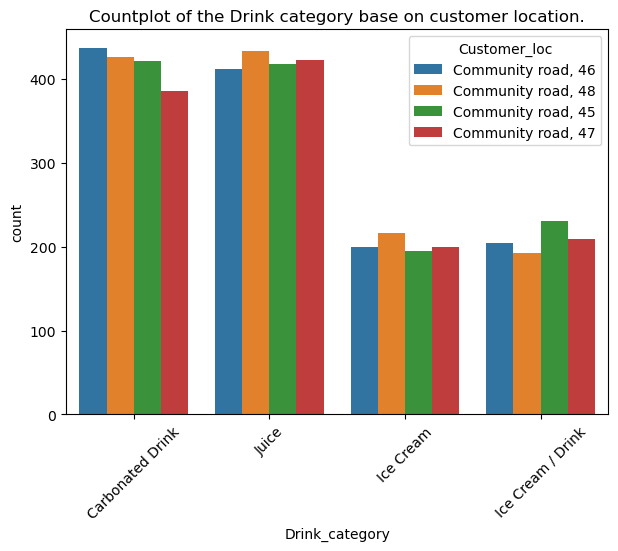

In [26]:
# Plotting a countplot of the drink category base on location
plt.figure(figsize=(7, 5))
sns.countplot(x=df["Drink_category"], hue=df["Customer_loc"])
plt.xticks(rotation=45)
plt.title("Countplot of the Drink category base on customer location.")
plt.show()

Text(0.5, 1.0, 'Review of the Ratings')

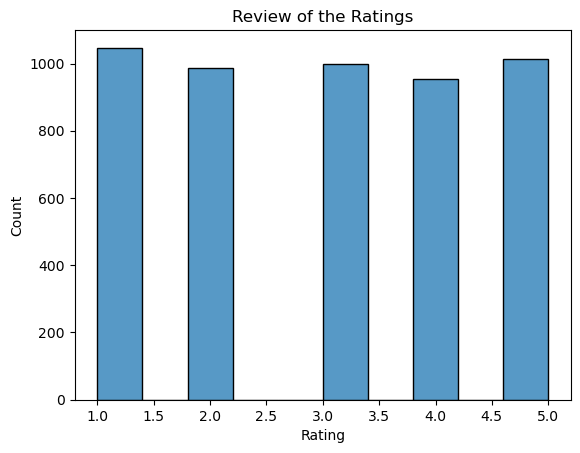

In [27]:
# Histogram plot of rating
sns.histplot(df.Rating, bins = 10)
plt.title("Review of the Ratings")

Text(0.5, 1.0, 'Review of the Meal price')

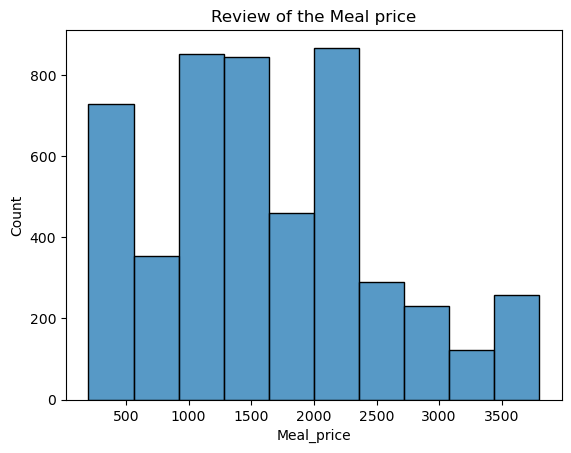

In [28]:
# Histogram plot of meal price
sns.histplot(df.Meal_price, bins = 10)
plt.title("Review of the Meal price")

Text(0.5, 1.0, 'Review of the Drink price')

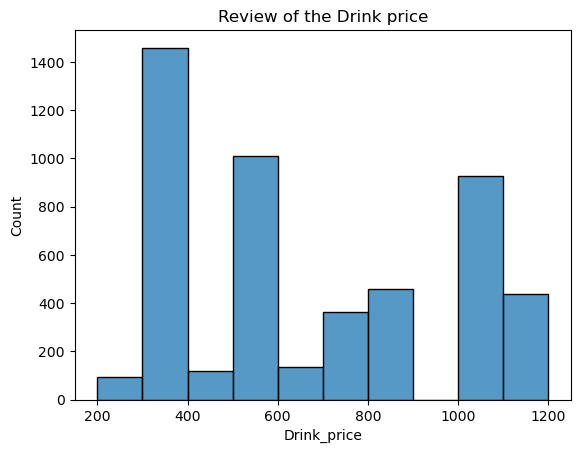

In [29]:
# Histogram plot of drink price
sns.histplot(df.Drink_price, bins = 10)
plt.title("Review of the Drink price")

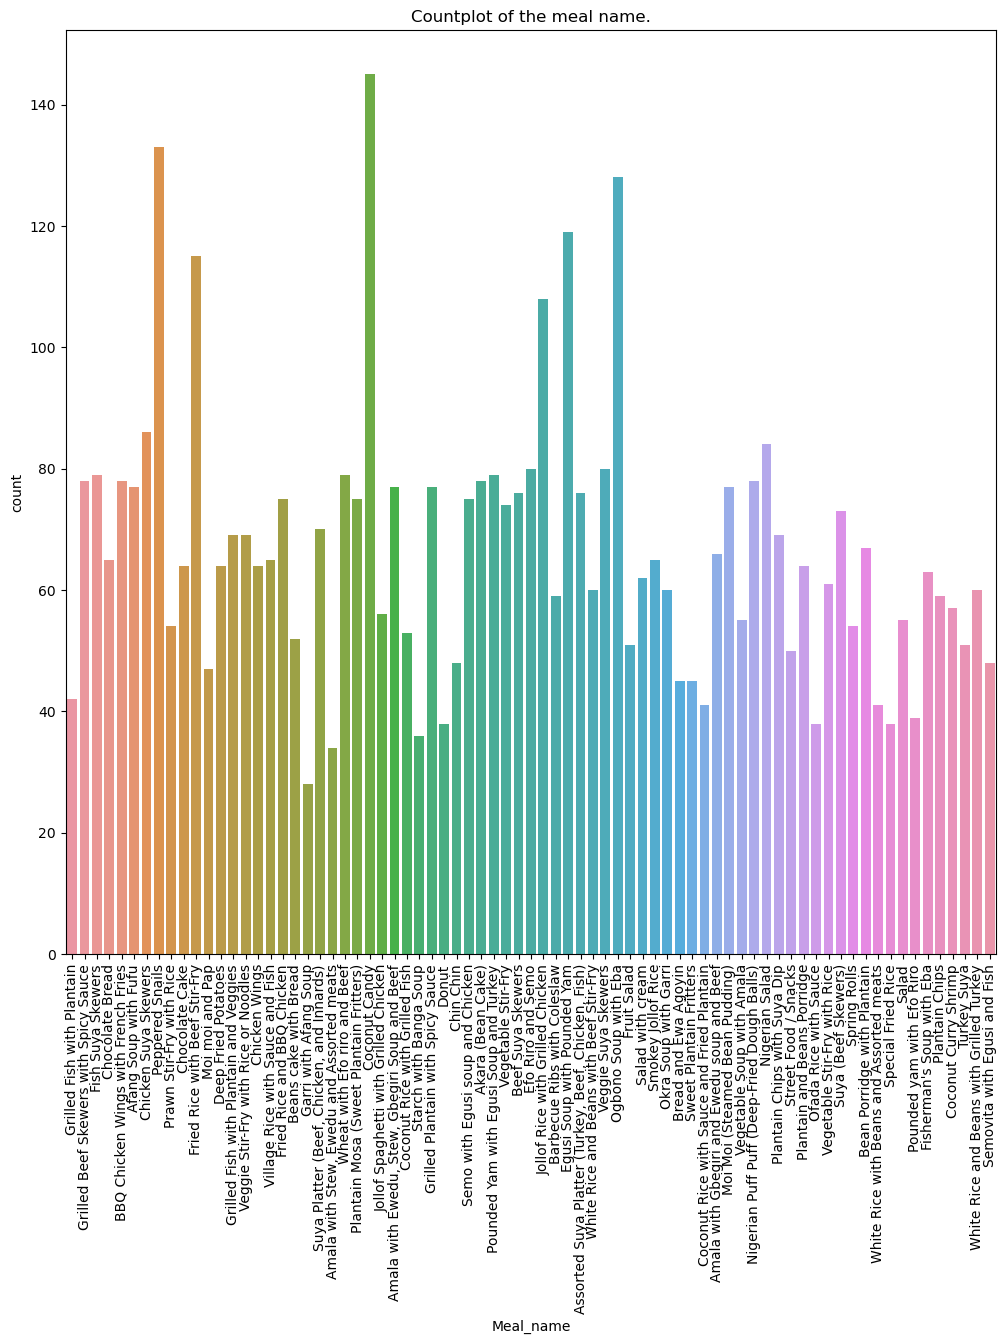

In [30]:
# Plotting a countplot of the meal category base on location
plt.figure(figsize=(12, 12))
sns.countplot(x=df["Meal_name"])
plt.xticks(rotation=90)
plt.title("Countplot of the meal name.")
plt.show()

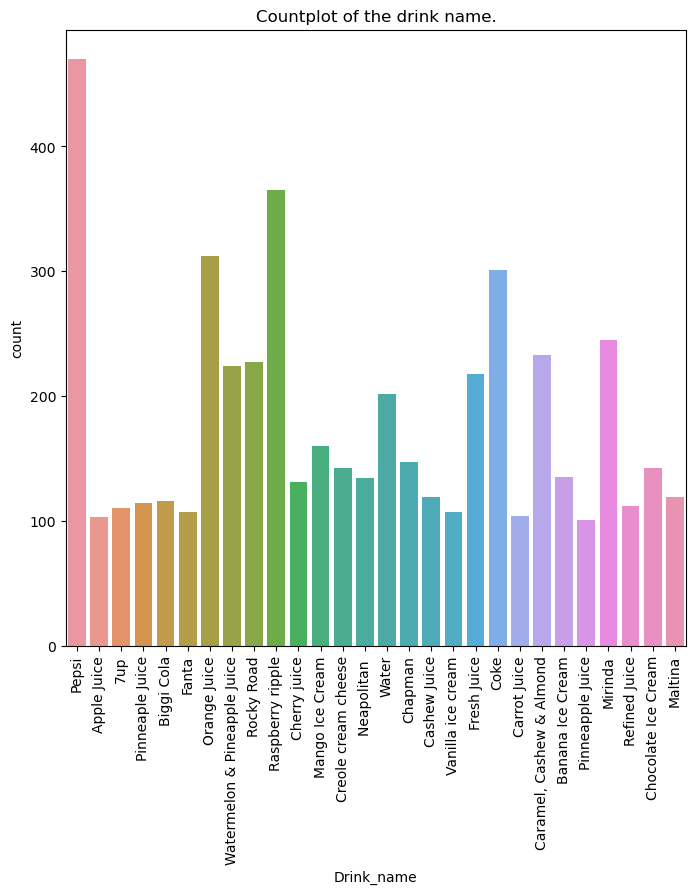

In [31]:
# Plotting a countplot of the meal category base on location
plt.figure(figsize=(8, 8))
sns.countplot(x=df["Drink_name"])
plt.xticks(rotation=90)
plt.title("Countplot of the drink name.")
plt.show()

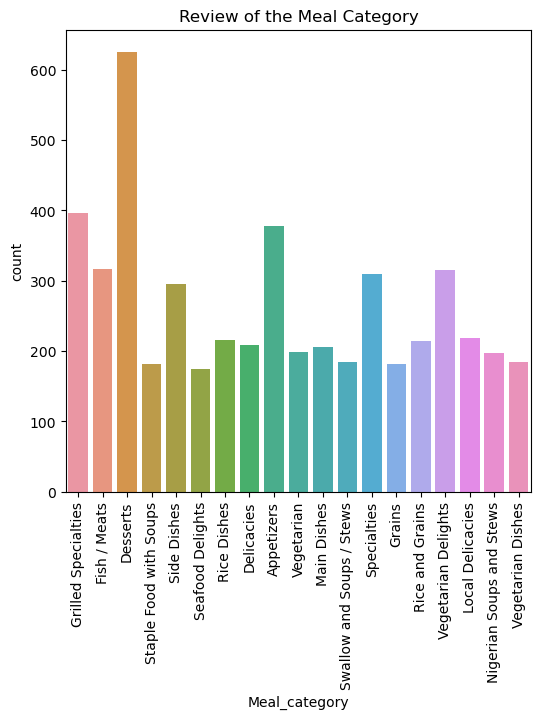

In [32]:
# Plotting a countplot of the meal category
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Meal_category"])
plt.xticks(rotation=90)
plt.title("Review of the Meal Category")
plt.show()

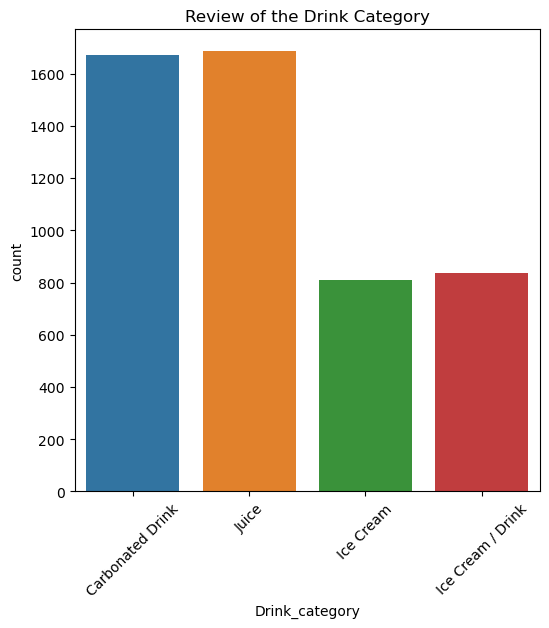

In [33]:
# Plotting a countplot of the drink category
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Drink_category"])
plt.xticks(rotation=45)
plt.title("Review of the Drink Category")
plt.show()

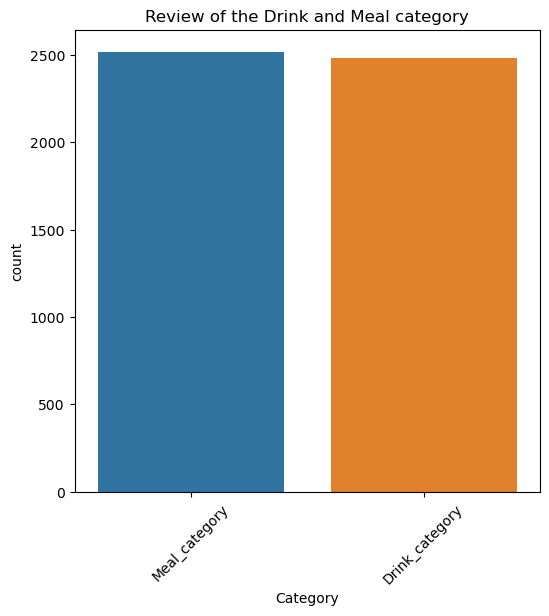

In [34]:
# Count plot of the category
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Category"])
plt.xticks(rotation=45)
plt.title("Review of the Drink and Meal category")
plt.show()

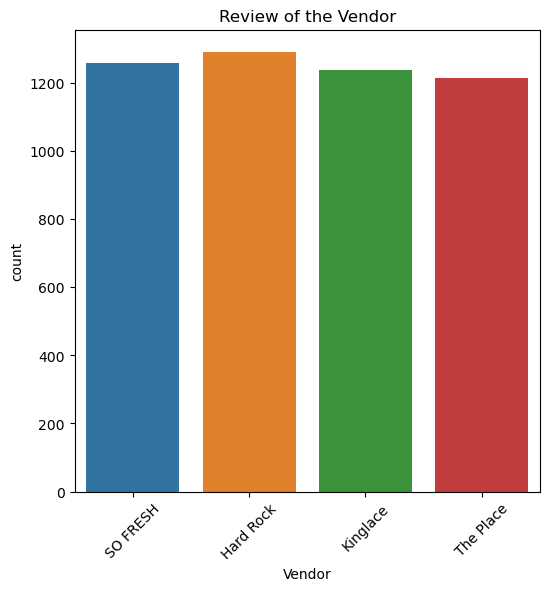

In [35]:
# Count plot of the category
plt.figure(figsize=(6, 6))
sns.countplot(x=df["Vendor"])
plt.xticks(rotation=45)
plt.title("Review of the Vendor")
plt.show()

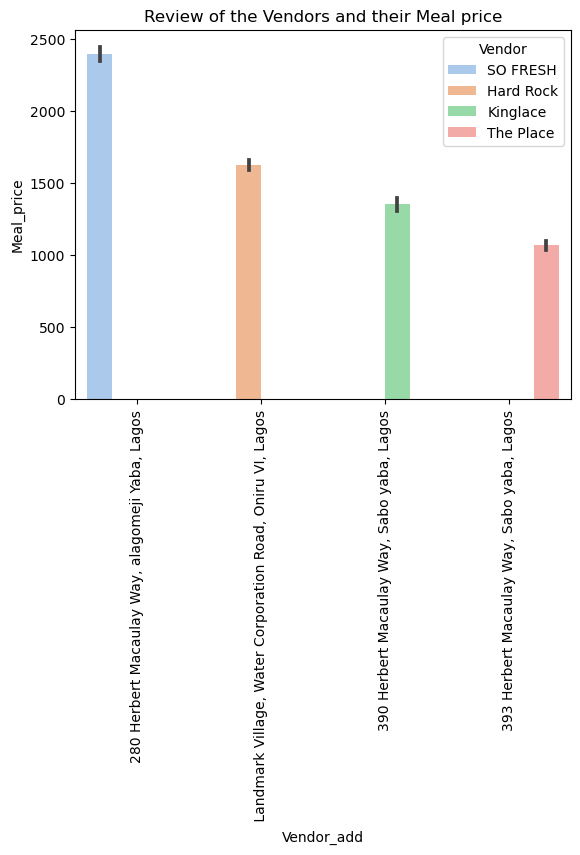

In [36]:
# Barplot of the vendor address and meal price
sns.barplot(x='Vendor_add', y='Meal_price', data=df, palette='pastel', hue='Vendor')
plt.xticks(rotation=90)
plt.title("Review of the Vendors and their Meal price")
plt.show()

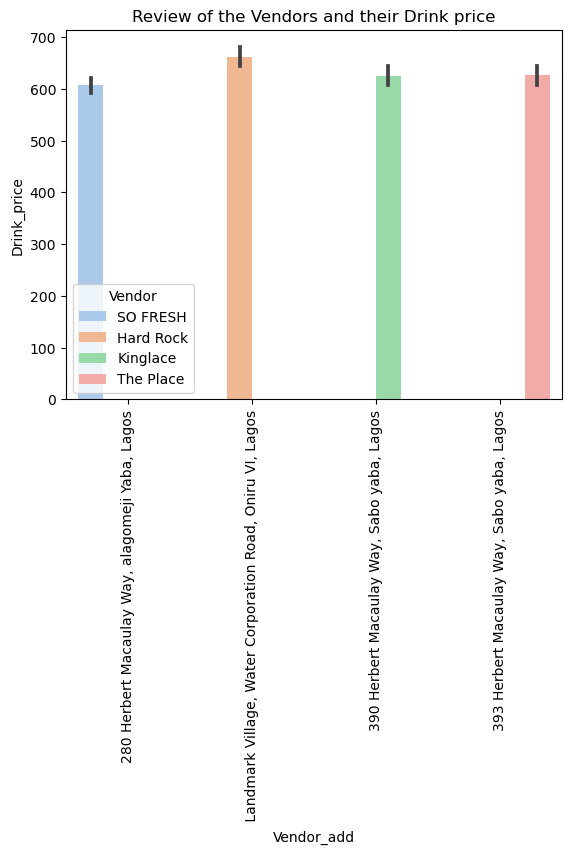

In [37]:
# Barplot of the vendor address and drink price
sns.barplot(x='Vendor_add', y='Drink_price', data=df, palette='pastel', hue='Vendor')
plt.xticks(rotation=90)
plt.title("Review of the Vendors and their Drink price")
plt.show()

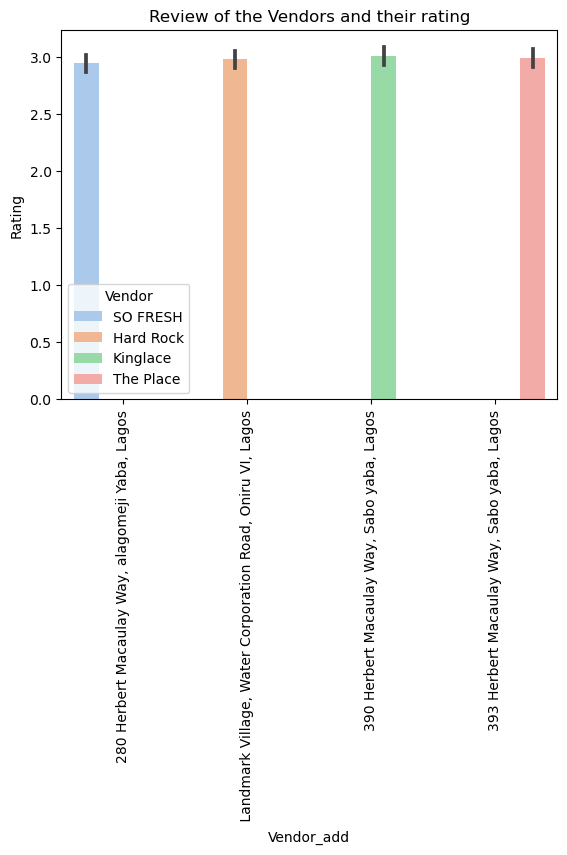

In [38]:
# get the relationship between Restaurant Location and Rating
sns.barplot(x='Vendor_add', y='Rating', data=df, palette='pastel', hue='Vendor')
plt.xticks(rotation=90)
plt.title("Review of the Vendors and their rating")
plt.show()